In [1]:
from OSMPythonTools.api import Api
api = Api()


[api] downloading data: way/5887599


In [10]:
import overpy
api = overpy.Overpass()

    # "lat_limits": [
    #     54.902082,
    #     54.95792888888889
    # ],
    # "lon_limits": [
    #     10.83367575,
    #     10.931587444444444
    # ],

# north = 55.10154336363636
# south = 54.98554027272727
# west = 10.973631818181818
# east = 11.044121727272728

north = 54.95792888888889
south = 54.902082
west = 10.83367575
east = 10.931587444444444

bbox = (south, west, north, east)

# Run a query to get all ways that are tagged as shipping lanes in the bounding box
# result = api.query(f"""
#     way["route"="ferry"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#     (._;>;);
#     out body;
# """)

result = api.query(f"""
    (
      way["seamark:type"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
      node["seamark:type"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
    );
    (._;>;);
    out body;
""")

# Print the details of the shipping lanes
for way in result.ways:
    print(f"Way {way.id} has {len(way.nodes)} nodes")

Way 502035048 has 12 nodes
Way 935316356 has 2 nodes
Way 935316357 has 2 nodes
Way 935316358 has 3 nodes


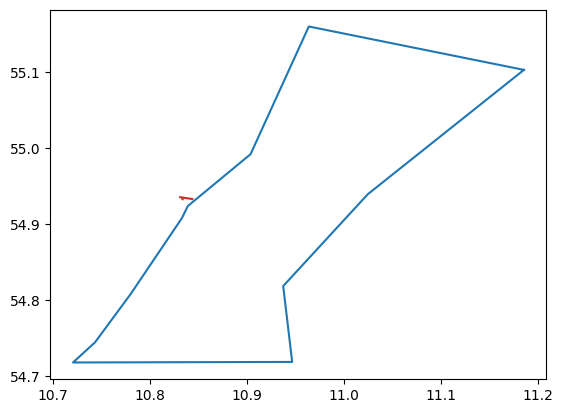

In [12]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot each way
for way in result.ways:
    # Get the x and y coordinates of the nodes
    x = [float(node.lon) for node in way.nodes]
    y = [float(node.lat) for node in way.nodes]

    # Plot the way
    plt.plot(x, y)

# Show the plot
plt.show()

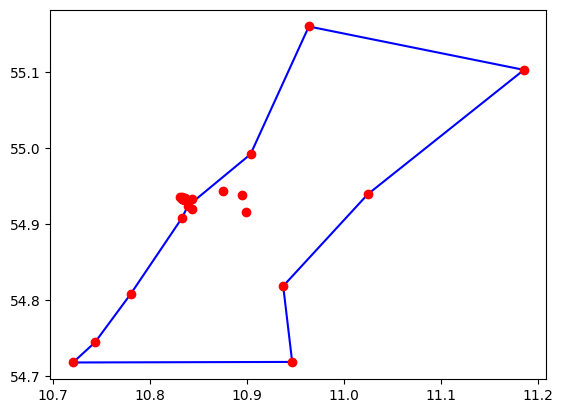

In [13]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure()

# Plot each way
for way in result.ways:
    # Get the x and y coordinates of the nodes
    x = [float(node.lon) for node in way.nodes]
    y = [float(node.lat) for node in way.nodes]

    # Plot the way
    plt.plot(x, y, 'b-')

# Plot each node
for node in result.nodes:
    # Get the x and y coordinates of the node
    x = float(node.lon)
    y = float(node.lat)

    # Plot the node
    plt.plot(x, y, 'ro')

# Show the plot
plt.show()

mmsi: 219016555, start_time: 1577904600.0, end_time: 1577905300.0


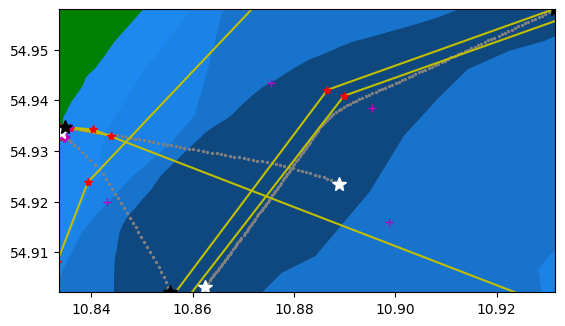

In [1]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np

path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_01e88fc6af"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_3cb9cf2af3"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_121252efbd"

env = ScmIrlEnv(path, awareness_zone = [500, 2000, 1000, 1000])

# env.scenario.depth_lands_polygons_lat_lon

from scm_irl.utils.plot_scenario import plot_scenario_lat_lon

plt = plot_scenario_lat_lon(env.scenario.depth_lands_polygons_lat_lon, env.scenario.lat_limits, env.scenario.lon_limits)

nodes, ways = env.scenario.get_nodes_and_ways_scenario()


# plot each way
for way in ways:
    # Get the x and y coordinates of the nodes
    x = [float(node.lon) for node in way.nodes]
    y = [float(node.lat) for node in way.nodes]

    # Plot the way
    plt.plot(x, y, 'y-')

for node in nodes:
    # Get the x and y coordinates of the node
    x = float(node.lon)
    y = float(node.lat)

    #print(x, y)
    if node.tags.get('seamark:type') is not None:
        plt.plot(x, y, 'm+')
    else:
        plt.plot(x, y, 'r*')



for mmsi in env.scenario.mmsis:
    vessel = env.scenario.vessels_states_lat_lon[mmsi]
    for state in vessel:
        x = float(state['lon'])
        y = float(state['lat'])
        plt.scatter(x, y, color='grey', s=2)
    
    # plot initial and final position
    initial_state = vessel[0]
    final_state = vessel[-1]
    x = float(initial_state['lon'])
    y = float(initial_state['lat'])
    plt.plot(x, y, 'white', marker='*', markersize=10)
    x = float(final_state['lon'])
    y = float(final_state['lat'])
    plt.plot(x, y, 'black', marker='*', markersize=10)


plt.show() 

In [7]:
float(nodes[0].lat)

54.9350162

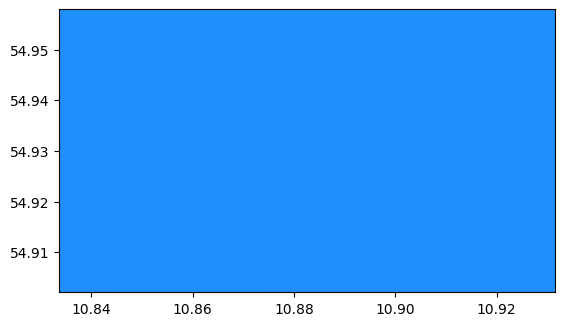

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse

from matplotlib.colors import LinearSegmentedColormap

from scm_irl.utils.plot_scenario import plot_scenario_lat_lon

plot_scenario_lat_lon(env.scenario.depth_lands_polygons_lat_lon, env.scenario.lat_limits, env.scenario.lon_limits)


# import overpy
# api = overpy.Overpass()


# bbox = (env.scenario.lat_limits[0], env.scenario.lon_limits[0], env.scenario.lat_limits[1], env.scenario.lon_limits[1])

# result = api.query(f"""
#     (
#       way["seamark:type"="shipping_lane"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["route"="ferry"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["route"="motorboat"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["route"="canoe"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["route"="waterway"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["route"="shipping_lane"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["seamark:type"="harbour"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["seamark:type"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["seamark:type"="separation_boundary"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["seamark:type"="separation_zone"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       way["seamark:type"="separation_lane"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#       node["seamark:type"]({bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]});
#     );
#     (._;>;);
#     out body;
# """)

# # plot each way
# for way in result.ways:
#     # Get the x and y coordinates of the nodes
#     x = [float(node.lon) for node in way.nodes]
#     y = [float(node.lat) for node in way.nodes]

#     # Plot the way
#     plt.plot(x, y, 'y-')

# # Plot each node
# for node in result.nodes:
#     x = float(node.lon)
#     y = float(node.lat)
#     if node.tags.get('seamark:type') is not None:
#         plt.plot(x, y, 'ro')
#     else:
#         plt.plot(x, y, 'go')

# plt.show()

In [93]:
for node in result.nodes:
    if node.tags.get('seamark:type'):
        print(node.tags.get('seamark:type'))

for way in result.ways:
    print(way.tags)

light_minor
light_minor
light_minor
harbour
buoy_lateral
light_minor
small_craft_facility
small_craft_facility
small_craft_facility
buoy_lateral
buoy_cardinal
buoy_cardinal
buoy_lateral
small_craft_facility
beacon_lateral
beacon_lateral
buoy_lateral
light_minor
light_minor
buoy_lateral
{'bicycle': 'yes', 'brand': 'Stena Line', 'duration': '4:35', 'ferry': 'secondary', 'foot': 'yes', 'motor_vehicle': 'yes', 'name': 'Grenå - Halmstad', 'operator': 'Stena Line', 'operator:addr:country': 'SE', 'operator:official_name': 'Stena Line Scandinavia AB', 'operator:wikidata': 'Q833903', 'route': 'ferry', 'seamark:ferry_route:category': 'free', 'seamark:type': 'ferry_route'}
{'bicycle': 'yes', 'duration': '02:45', 'foot': 'yes', 'hgv': 'no', 'maxlength': '6', 'motor_vehicle': 'yes', 'name': 'Anholtfærgen', 'operator': 'Grenaa-Anholt Færgefart', 'route': 'ferry', 'seamark:ferry_route:category': 'free', 'seamark:type': 'ferry_route', 'website': 'https://www.anholtfergen.dk/'}
{'amenity': 'lifeboat_st

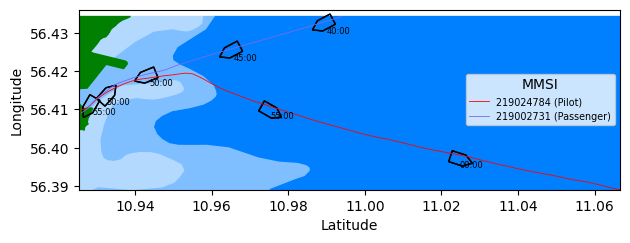

In [92]:
from sllib.visualisations import seamanship_score

import pandas as pd

[df,dict_e] = seamanship_score.plot_scenario(path, with_risk=False)

In [2]:
## read all the data and get the list of possible node["seamark:type"] that can exist in the data

import os
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np


scenearios_path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/"

nodes_types = []

for sceneario_path in os.listdir(scenearios_path):
    print(sceneario_path)
    path = os.path.join(scenearios_path, sceneario_path)
    env = ScmIrlEnv(path, awareness_zone = [500, 2000, 1000, 1000])
    nodes, ways = env.scenario.get_nodes_and_ways_scenario()
    for node in nodes:
        if node.tags.get('seamark:type') is not None:
            if node.tags.get('seamark:type') not in nodes_types:
                nodes_types.append(node.tags.get('seamark:type'))
                   
print(len(nodes_types))
print(nodes_types)

scenario_d3f0cf5d55
mmsi: 354879000, start_time: 1577922610.0, end_time: 1577923190.0
scenario_98c1101462
mmsi: 215811000, start_time: 1577914800.0, end_time: 1577916300.0
scenario_62044ed4b7
mmsi: 219000809, start_time: 1577875860.0, end_time: 1577876700.0
scenario_6a717032ed
mmsi: 538007960, start_time: 1577960400.0, end_time: 1577961900.0
scenario_b3e155f3c9
mmsi: 219000836, start_time: 1577950280.0, end_time: 1577951180.0
scenario_940984476b
mmsi: 636091633, start_time: 1577892600.0, end_time: 1577894000.0
scenario_1c98c5f5eb
mmsi: 240290000, start_time: 1577985000.0, end_time: 1577986500.0
scenario_db6b8b05e9
mmsi: 538005408, start_time: 1577899800.0, end_time: 1577901300.0
scenario_44d051b172
mmsi: 219026197, start_time: 1577953230.0, end_time: 1577954730.0
scenario_174fb21c38
mmsi: 219005068, start_time: 1577948630.0, end_time: 1577949890.0
scenario_acfa714923
mmsi: 258897000, start_time: 1577879400.0, end_time: 1577880900.0
scenario_6a304b9ca6
mmsi: 212204000, start_time: 15779

In [5]:
print(len(nodes_types))
print(nodes_types)

24
['light_major', 'buoy_safe_water', 'buoy_lateral', 'beacon_lateral', 'light_minor', 'bridge', 'buoy_special_purpose', 'buoy_cardinal', 'beacon_special_purpose', 'small_craft_facility', 'sea_area', 'mooring', 'rock', 'pile', 'obstruction', 'landmark', 'harbour', 'building', 'pilot_boarding', 'wreck', 'crane', 'radar_station', 'buoy_isolated_danger', 'signal_station_warning']


In [6]:
# write the list into a file
with open('nodes_types.txt', 'w') as f:
    for item in nodes_types:
        f.write("%s\n" % item)


In [3]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np

path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"

env = ScmIrlEnv(path, awareness_zone = [500, 1000, 500, 500])

nodes, ways = env.scenario.get_nodes_and_ways_scenario_north_east()


mmsi: 219023834, start_time: 1577905680.0, end_time: 1577906100.0


In [19]:
nodes

[{'id': 112289667,
  'north': 3666.3019207029097,
  'east': -35.82730581770227,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 112289672,
  'north': 3617.633712880568,
  'east': 135.64142692441453,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 112289706,
  'north': 3578.6108504480626,
  'east': 422.8755939400668,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 112291498,
  'north': -1377.3198881913202,
  'east': 7841.636749344036,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 112291504,
  'north': -2883.801619756543,
  'east': 10374.125664905923,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 112303140,
  'north': -3068.899009740064,
  'east': 10802.893329684608,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 112303144,
  'north': -3001.9030292916923,
  'east': 11706.583250448784,
  'type': None,
  'color': [96, 96, 96],
  'value': 2},
 {'id': 194276164,
  'north': -3053.3501290406907

In [22]:
nodes_d, ways_d = env.scenario.get_nodes_and_ways_scenario()
nodes_d[8].tags

{}

In [23]:
nodes_d[8].tags.get('seamark:type')

In [2]:
env.scenario.nodes_list()

([('buoy_lateral', 27, [255, 165, 0]),
  ('buoy_safe_water', 26, [255, 192, 203]),
  ('light_major', 25, [255, 160, 122]),
  ('signal_station_warning', 24, [210, 105, 30]),
  ('buoy_isolated_danger', 23, [255, 218, 185]),
  ('radar_station', 22, [255, 192, 203]),
  ('crane', 21, [255, 0, 255]),
  ('wreck', 20, [160, 82, 45]),
  ('pilot_boarding', 19, [255, 99, 71]),
  ('building', 18, [255, 165, 0]),
  ('harbour', 17, [255, 20, 147]),
  ('landmark', 16, [105, 105, 105]),
  ('obstruction', 15, [139, 69, 19]),
  ('pile', 14, [153, 50, 204]),
  ('rock', 13, [255, 140, 0]),
  ('mooring', 12, [128, 0, 0]),
  ('sea_area', 11, [255, 105, 180]),
  ('small_craft_facility', 10, [255, 215, 0]),
  ('beacon_special_purpose', 9, [192, 192, 192]),
  ('buoy_cardinal', 8, [255, 255, 255]),
  ('buoy_special_purpose', 7, [255, 0, 255]),
  ('bridge', 6, [128, 128, 128]),
  ('light_minor', 5, [165, 42, 42]),
  ('beacon_lateral', 4, [128, 0, 128]),
  ('way', 3, [255, 255, 0]),
  (None, 2, [96, 96, 96]),
  (

In [4]:

node = nodes[0]
coords = env.scale_coords([(node['east'], node['north'])],
                            env.scenario.north_min, env.scenario.north_max,
                            env.scenario.east_min, env.scenario.east_max,
                            100, 100)

coords[0]

(-0.571196578892174, 41.069358018656146)

In [6]:
ways[0]

{'id': 26204104,
 'nodes': [(3666.3019207029097, -35.82730581770227),
  (3617.633712880568, 135.64142692441453),
  (3578.6108504480626, 422.8755939400668),
  (-1377.3198881913202, 7841.636749344036),
  (-2883.801619756543, 10374.125664905923),
  (-3024.6705652241835, 10644.396437441726),
  (-3068.899009740064, 10802.893329684608),
  (-3053.3501290406907, 11112.327674828002),
  (-3001.9030292916923, 11706.583250448784),
  (-2896.8083662750723, 12474.901216885857),
  (-2864.3439335378916, 12563.927725790521)],
 'type': None,
 'color': [255, 255, 0],
 'value': 1}

In [8]:
way = ways[0]
coords = env.scale_coords([(node[1], node[0]) for node in way['nodes']],
                env.scenario.north_min, env.scenario.north_max,
                env.scenario.east_min, env.scenario.east_max,
                100, 100)

coords

[(-0.571196578892174, 41.069358018656146),
 (2.162538244139937, 41.851630944640974),
 (6.741927338455209, 42.47886852213332),
 (125.01961791185903, 122.13847822146242),
 (165.39521891327627, 146.3530512420293),
 (169.70415973714134, 148.61732122611485),
 (172.23108384008194, 149.32823120721577),
 (177.16441151582126, 149.0783048395778),
 (186.6386587145731, 148.2513651379764),
 (198.88799156039948, 146.56211638150873),
 (200.30734576961086, 146.0402963284577)]

In [6]:
float(nodes[0].lat)

for node in nodes:
    print(node.id)
    print(lat_lon_to_north_east(float(node.lat), float(node.lon), env.scenario.lat0, env.scenario.lon0))

112289667
(3666.3019207029097, -35.82730581770227)
112289672
(3617.633712880568, 135.64142692441453)
112289706
(3578.6108504480626, 422.8755939400668)
112291498
(-1377.3198881913202, 7841.636749344036)
112291504
(-2883.801619756543, 10374.125664905923)
112303140
(-3068.899009740064, 10802.893329684608)
112303144
(-3001.9030292916923, 11706.583250448784)
194276164
(-3053.3501290406907, 11112.327674828002)
194276166
(-3024.6705652241835, 10644.396437441726)
283251508
(-64925.735295313745, -45195.195620505096)
286927276
(3428.1394355522943, 72.02699526975022)
286929363
(3426.4245016484238, 7.9389015912582295)
286966683
(-2896.8083662750723, 12474.901216885857)
288583193
(-64041.91904077631, -44487.04153792522)
288583309
(243133.03762425552, 50511.13594504012)
288583334
(295560.93730489525, 46059.54338462152)
288583407
(311450.1972199409, 64443.08239165811)
289394625
(556993.1325704915, -6987.507389261475)
289394627
(556412.3561713211, -6995.20460618347)
289394629
(555728.7975767626, -7263

In [11]:
import yaml

with open('../scm_irl/conf/env/nodes_map.yaml', 'r') as file:
    data = yaml.safe_load(file)

print(data)

{'buoy_lateral': {'value': 3, 'color': [255, 165, 0]}, 'beacon_lateral': {'value': 4, 'color': [128, 0, 128]}, 'light_minor': {'value': 5, 'color': [165, 42, 42]}, 'bridge': {'value': 6, 'color': [128, 128, 128]}, 'buoy_special_purpose': {'value': 7, 'color': [255, 0, 255]}, 'buoy_cardinal': {'value': 8, 'color': [255, 255, 255]}, 'beacon_special_purpose': {'value': 9, 'color': [192, 192, 192]}, 'small_craft_facility': {'value': 10, 'color': [255, 215, 0]}, 'sea_area': {'value': 11, 'color': [255, 105, 180]}, 'mooring': {'value': 12, 'color': [128, 0, 0]}, 'rock': {'value': 13, 'color': [255, 140, 0]}, 'pile': {'value': 14, 'color': [153, 50, 204]}, 'obstruction': {'value': 15, 'color': [139, 69, 19]}, 'landmark': {'value': 16, 'color': [105, 105, 105]}, 'harbour': {'value': 17, 'color': [255, 20, 147]}, 'building': {'value': 18, 'color': [255, 165, 0]}, 'pilot_boarding': {'value': 19, 'color': [255, 99, 71]}, 'wreck': {'value': 20, 'color': [160, 82, 45]}, 'crane': {'value': 21, 'colo